In [1]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import scipy.special as ssp
from scipy import stats
from scipy.optimize import curve_fit
import powerlaw

## Graph classes implementation

In [3]:
class RandomGraph():
    def __init__(self, nodes=2000):
        """
            Initialization of empty graph with optional argument n (int) - number of nodes for the resulted graph (default value = 2000)
        """
        self._num_of_nodes = nodes
        self._g = nx.Graph()
        self._nodes = []
        
    def generate(self, p = 0.5):
        """
            Generation of Random Graph with optional argument p (float) - probability ([0,1]) (default value = 0.5)
        """
        self._nodes = list(range(0, self._num_of_nodes))
        random.shuffle(self._nodes)
        self._g.add_nodes_from(self._nodes)
        for n1 in self._nodes:
            for n2 in self._nodes:
                if n1 != n2 and np.random.uniform(0, 1) < p:
                    self._g.add_edge(n1, n2)
        return self._g

In [4]:
class Watts_Strogatz_model():
    def __init__(self, nodes=2000):
        """
            Initialization of empty graph with optional argument n (int) - number of nodes for the resulted graph (default value = 2000)
        """
        self._num_of_nodes = nodes
        self._g = nx.Graph()
        self._nodes = []
        self._K = 0
        self._p = 0

    def generate_ring(self, K):
        """
            Creation of initial ring graph for Watts Strogatz Model with degree K
        """
        self._nodes = list(range(0, self._num_of_nodes))
        for n in self._nodes:
            for i in range(1, K+1):
                self._g.add_edge(n, self._nodes[n-i])
        return self._g
    
    def generate(self, p, K=4):
        """
            Generation of Watts Strogatz network with arguments:
                * p (float) - probability ([0,1]) 
                * K (optional int) - Degree multiplied by 2 for the initial ring in the model (must be even)
        """
        self._K = K
        self._p = p
        K = K/2
        if int(K) != K:
            raise Exception('K must me an even number')
        self.generate_ring(int(K))
        for i in range(len(self._nodes)):
            ns = self._g.neighbors(self._nodes[i])
            for n in list(ns):
                if self._nodes[i] < n:
                    if np.random.uniform(0, 1) < p:
                        new_connection = self._nodes[random.randint(0, self._num_of_nodes-1)]
                        while (new_connection == self._nodes[i] or self._g.has_edge(self._nodes[i], new_connection)):
                            new_connection = self._nodes[random.randint(0, self._num_of_nodes-1)]
                        self._g.add_edge(self._nodes[i], new_connection)
                        self._g.remove_edge(self._nodes[i], n)
        return self._g

In [5]:
class Barabasi_Albert_model():
    def __init__(self, nodes=2000):
        """
            Initialization of empty graph with optional argument n (int) - number of nodes for the resulted graph (default value = 2000)
        """
        self._num_of_nodes = nodes
        self._nodes = []
        self._g = nx.Graph()
      
    def startup(self, m_0=3):
        """
            Creation of initial part of graph for Barabassi Albert Model with optional 
                m_0 (optional int) - number of nodes in the initial fully connected part of the graph (default value = 3)
        """
        self._nodes = list(range(0, m_0))
        for n1 in self._nodes:
            for n2 in self._nodes:
                if n1 != n2:
                    self._g.add_edge(n1, n2)
        return self._g
                    
    def generate(self, m_0=3, m=2):
        """
            Generation of Barabassi-Albert network with arguments:
                * m_0 (optional int) - number of nodes in the initial fully connected part of the graph (default value = 3) 
                * m (optional int) - number of connections created for every new node (default value = 2) 
        """
        self.startup(m_0)
        for i in range(m_0, self._num_of_nodes):
            degrees = [val for (node, val) in self._g.degree()]
            deg_sum = sum(degrees)
            ps = [self._g.degree(j)/deg_sum for j in self._nodes]
            new_neighbors = random.choices(self._nodes, weights=ps, k=m+1)
            edges = [(i, new_neighbors[j]) for j in range(len(new_neighbors))]
            self._g.add_edges_from(edges)
            self._nodes.append(i)
        return self._g

## Network visualization for 20 nodes

##### Random Graph with $p=0.4$

In [8]:
RG_20 = RandomGraph(20).generate(0.4)

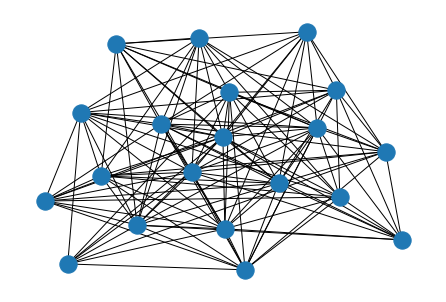

In [9]:
nx.draw(RG_20)

##### Watts Strogatz model with  $p=0.5$ and $K=4$

In [10]:
WSM_20 = Watts_Strogatz_model(20).generate(0.5, K=4)

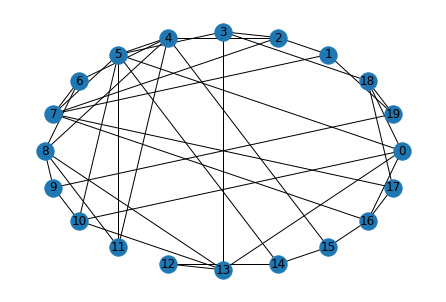

In [11]:
nx.draw_circular(WSM_20, with_labels=True)

##### Barabasi Albert model with $m_0=4$ and $m=2$

In [20]:
BAM_1 = Barabasi_Albert_model(20).generate(4, 2)

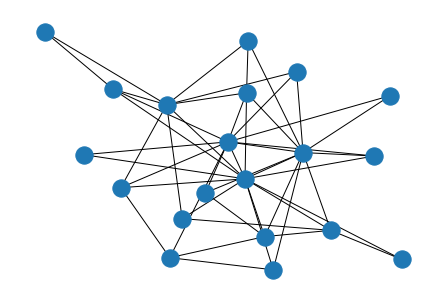

In [21]:
nx.draw(BAM_1)

##### Barabasi Albert model with $m_0=7$ and $m=4$

In [23]:
BAM_2 = Barabasi_Albert_model(20).generate(7, 4)

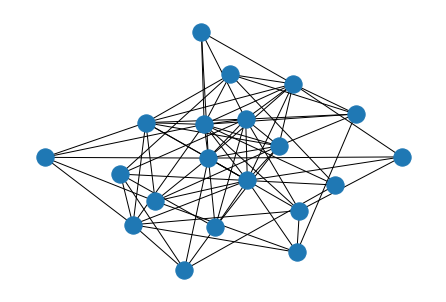

In [24]:
nx.draw(BAM_2)

## Network characteristics for 2000 nodes

In [12]:
RG = RandomGraph().generate()

Number of nodes: 2000
Number of edges: 1499121
Average degree: 1499.121
Variance of degree: 367.54435899999993


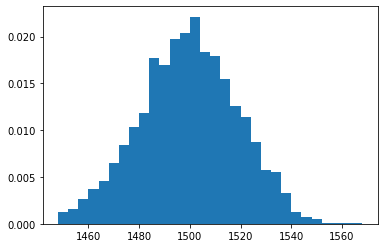

In [13]:
print(f"Number of nodes: {RG.number_of_nodes()}")
print(f"Number of edges: {RG.number_of_edges()}")
RG_degrees = [val for (node, val) in RG.degree()]
print(f"Average degree: {np.mean(RG_degrees)}")
print(f"Variance of degree: {np.var(RG_degrees)}")
plt.hist(RG_degrees, density=True, bins=30)
plt.show()

In [14]:
WSM = Watts_Strogatz_model().generate(0.5, 100)

Number of nodes: 2000
Number of edges: 100000
Average degree: 100.0
Variance of degree: 47.874


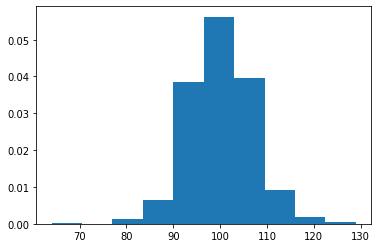

In [15]:
print(f"Number of nodes: {WSM.number_of_nodes()}")
print(f"Number of edges: {WSM.number_of_edges()}")
WSM_degrees = [val for (node, val) in WSM.degree()]
print(f"Average degree: {np.mean(WSM_degrees)}")
print(f"Variance of degree: {np.var(WSM_degrees)}")
plt.hist(WSM_degrees, density=True)
plt.show()

In [105]:
BAM = Barabasi_Albert_model().generate(70, 69)

Number of nodes: 2000
Number of edges: 128848
Average degree: 128.848
Variance of degree: 7116.532896000001


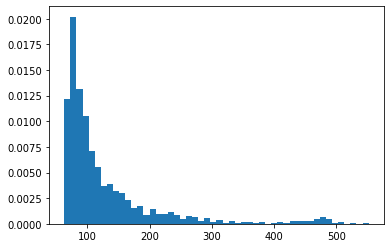

In [106]:
print(f"Number of nodes: {BAM.number_of_nodes()}")
print(f"Number of edges: {BAM.number_of_edges()}")
BAM_degrees = [val for (node, val) in BAM.degree()]
print(f"Average degree: {np.mean(BAM_degrees)}")
print(f"Variance of degree: {np.var(BAM_degrees)}")
plt.hist(BAM_degrees, density=True, bins=50)
plt.show()

## Degree distribution fitting for presented models 

#### Random graph

The degree of a random graph follows a binomial distribution $$p_k = \binom{N-1}{k}p^{k}(1-p)^{(N-1)-k}$$

In [81]:
def RG_pk(k, n, p):
    return ssp.binom(n-1, k)*(p**k)*((1-p)**(n-1-k))

In [111]:
N = 500
p = 0.1
RG_deg = RandomGraph(N).generate(p)

In [112]:
RG1_degrees = [val for (node, val) in RG_deg.degree()]
RG_scatter_degrees = [RG1_degrees.count(RG1_degrees[i])/len(RG1_degrees) for i in range(len(RG1_degrees))]

In [113]:
RG_params, pcov = curve_fit(RG_pk, RG1_degrees, RG_scatter_degrees, p0=[N, 0.1])

<ipython-input-81-37919d57dde7>:2: RuntimeWarning: overflow encountered in multiply
  return ssp.binom(n-1, k)*(p**k)*((1-p)**(n-1-k))
<ipython-input-81-37919d57dde7>:2: RuntimeWarning: overflow encountered in power
  return ssp.binom(n-1, k)*(p**k)*((1-p)**(n-1-k))


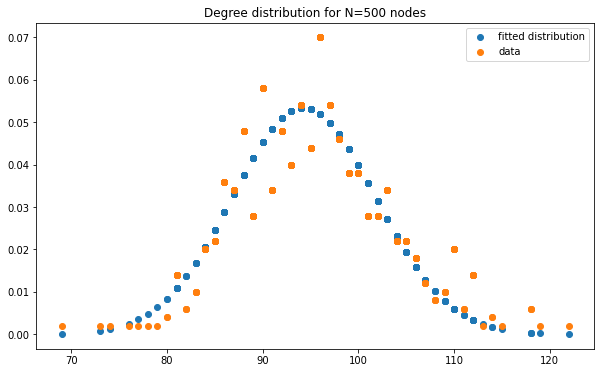

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(RG1_degrees, RG_pk(RG1_degrees, RG_params[0], RG_params[1]), label='fitted distribution')
plt.scatter(RG1_degrees, RG_scatter_degrees, label='degree distribution')
plt.title('Degree distribution for N=500 nodes')
plt.legend()

#### Watts Strogatz Model

The degree in this model follows a distribution described with probability 
$$p_k = \sum_{n=0}^{f(k, K)}C_{K/2}^{n}(1-p)^n p^{K/2-n} \frac{(pK/2)^{k-n-K/2}}{(k-n-K/2)!} e^{-pK/2}$$

In [120]:
def WSM_pk(ks, K, p):
    pk = []
    for k in ks:
        pk.append(np.sum([ssp.binom(K/2, j)*((1-p)**j)*(p**(K/2 - j)) * ((p*K/2)**(k-j-K/2))/(math.factorial(int(k-j-K/2))) * np.exp(-p*K/2)  for j in range(int(min((k-K/2), int(K/2))))]))
    return pk

In [129]:
N = 2000
p = 0.6
k = 20
WSM_deg = Watts_Strogatz_model(N).generate(p, k)

In [130]:
WSM1_degrees = [val for (node, val) in WSM_deg.degree()]
WSM_scatter_degrees = [WSM1_degrees.count(WSM1_degrees[i])/len(WSM1_degrees) for i in range(len(WSM1_degrees))]

In [131]:
WSM_params, _ = curve_fit(WSM_pk, WSM1_degrees, WSM_scatter_degrees, p0=[k, p])

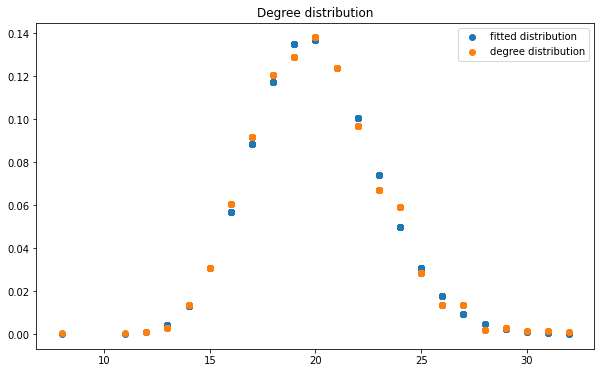

In [133]:
plt.figure(figsize=(10,6))
plt.title('Degree distribution')
plt.scatter(WSM1_degrees, WSM_pk(WSM1_degrees, WSM_params[0], WSM_params[1]), label='fitted distribution')
plt.scatter(WSM1_degrees, WSM_scatter_degrees, label='degree distribution')
plt.legend()

#### Barabassi Albert Model

Degree distribution 
$$p_k ∼ k^{-\gamma}$$

In [134]:
results = powerlaw.Fit(BAM_degrees)

Calculating best minimal value for power law fit


In [135]:
scatter_BAM_degrees = [BAM_degrees.count(BAM_degrees[i])/len(BAM_degrees) for i in range(len(BAM_degrees))]

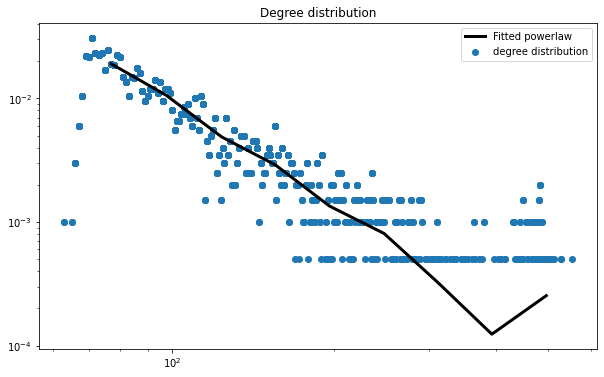

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(BAM_degrees, scatter_BAM_degrees, label='degree distribution')
plt.title('Degree distribution')
results.plot_pdf(color='black', linewidth=3, label="Fitted powerlaw")
plt.legend()

# Web scrapping

To complete this excercise I used a video, precented by the author of this repository https://github.com/MariyaSha/WebscrapingFacebook/blob/main/FB_Scraper.ipynb

In [154]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

In [155]:
from time import sleep
import pandas as pd
from bs4 import BeautifulSoup

In [156]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)

driver = webdriver.Chrome('C:/Users/User/chromedriver.exe', chrome_options=chrome_options)
driver.get("http://www.facebook.com") #accessing facebook page

<ipython-input-156-381b026f46be>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/User/chromedriver.exe', chrome_options=chrome_options)
<ipython-input-156-381b026f46be>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('C:/Users/User/chromedriver.exe', chrome_options=chrome_options)


In [157]:
def log_to_facebook(driver, PATH, user_id, user_pass):
    #input email
    user_name = driver.find_element(By.XPATH, "//input[@type='text']")
    user_name.send_keys(user_id)
    sleep(3)
    #input password
    password = driver.find_element(By.XPATH, "//input[@type='password']")
    password.send_keys(user_pass)
    sleep(3)
    #click to log in
    log_in = driver.find_element(By.XPATH, "//button[@name='login']")
    log_in.click()
    sleep(5)


In [158]:
PATH = 'C:/Users/User/chromedriver.exe'
user_id = 'kasiamacioszek1201@gmail.com'
user_pass = '----'

In [ ]:
log_to_facebook(driver, PATH, user_id, user_pass)

In [ ]:
my_profile = driver.find_element(By.XPATH, "//span[text()='Kasia Macioszek']")
my_profile.click()
sleep(5)

In [166]:
friends_tab = driver.find_element(By.XPATH, "//span[text()='Znajomi']")
friends_tab.click()
sleep(5)

In [167]:
def create_csv(friends_set):
    friends_set = list(friends_set)
    for i in range(len(friends_set)):
        friends_set[i] = tuple(item for item in friends_set[i].split('\n'))
    df = pd.DataFrame(friends_set, columns=['Source', 'Target', 'Common'])
    print(df)
    df.to_csv('facebook_friends_edges.csv', index=False)

def clean_set(friends_set):
    to_remove = []
    for friend in friends_set:
        if 'znajomy' not in friend:
            to_remove.append(friend)
    friends_set.difference_update(to_remove)
    return friends_set

def save_links(links):
    df = pd.DataFrame(links, columns=['url'])
    df.to_csv('LinksToCheck.csv', index=False)

In [168]:
def download_my_friends(my_name):
    friends_set = set()

    names = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")
    distanceToTop = driver.execute_script("return document.body.scrollHeight")
    x = True
    while x:
        for i in range(len(names)):
            friends_set.add(my_name + '\n' + names[i].text)
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        names = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")
        sleep(5)
        new_distanceToTop = driver.execute_script("return document.body.scrollHeight")
        if new_distanceToTop == distanceToTop:
            x = False
        else:
            distanceToTop = new_distanceToTop

    html = driver.page_source
    soup = BeautifulSoup(html)
    links = soup.find_all('a', {"class":"x1i10hfl x1qjc9v5 xjbqb8w xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r xat24cr x1mh8g0r x2lwn1j xeuugli xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1o1ewxj x3x9cwd x1e5q0jg x13rtm0m x1q0g3np x87ps6o x1lku1pv x1rg5ohu x1a2a7pz xc9qbxq xq8finb x1n2onr6 x14qfxbe"})
    
    user_links = []
    for link in links:
        user_links.append(link["href"])
    
    save_links(user_links)
    clean_set(friends_set)
    create_csv(friends_set)

In [ ]:
download_my_friends('Kasia Macioszek')

In [ ]:
checked_links = ['https://www.facebook.com/kasiamacioszek1201/']
df = pd.DataFrame(checked_links, columns=['checked'])
df.to_csv('linksChecked.csv', index=False)

In [169]:
def add_link(link):
    checked_links = [link]
    df = pd.DataFrame(checked_links, columns=['checked'])
    df.to_csv('linksChecked.csv', mode='a', index=False, header=False)
    
def add_to_csv(friends_set):
    friends_set = list(friends_set)
    for i in range(len(friends_set)):
        friends_set[i] = tuple(item for item in friends_set[i].split('\n'))
    df = pd.DataFrame(friends_set, columns=['Source', 'Target', 'Common'])
    print(df)
    df.to_csv('facebook_friends_edges.csv', mode='a', index=False, header=False)

In [170]:
def scrap_data(driver, user_links):
    j = 0
    while j <= len(user_links):
        try:
            driver.get(user_links[j]+"/friends")
            sleep(7)
            friend_name = driver.find_element(By.XPATH, "//h1[@class='x1heor9g x1qlqyl8 x1pd3egz x1a2a7pz']").text
            if friend_name == '':
                friend_name = user_links[j].split('/')[-1]
            friends_set = set()
            names = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")
            distanceToTop = driver.execute_script("return document.body.scrollHeight")
            x = True
            while x:
                driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
                sleep(5)
                new_distanceToTop = driver.execute_script("return document.body.scrollHeight")
                if new_distanceToTop == distanceToTop:
                    x = False
                else:
                    distanceToTop = new_distanceToTop
            names = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")
            sleep(12)
            for i in range(len(names)):
                friends_set.add(friend_name + '\n' + names[i].text)

            friends_set = clean_set(friends_set)
            add_to_csv(friends_set)
            add_link(user_links[j])
            j += 1
        except:
            j += 1

In [ ]:
user_links = pd.read_csv('LinksToCheck.csv')
user_links = list(user_links['url'])

In [ ]:
scrap_data(driver, user_links)

### Network data

In [145]:
FB_edges = pd.read_csv('fb_friends_edges.csv', index_col=False, encoding = "utf-8")

In [146]:
FB_edges

,Source,Target
0,Kasia Macioszek,Karol Konieczko
1,Kasia Macioszek,Mati ZajÄ…c
2,Kasia Macioszek,Aleksandra Kutrzeba
3,Kasia Macioszek,MichaĹ‚ Kita
4,Kasia Macioszek,Magdalena Trepka
...,...,...
86351,Damian Ĺomotowski,Julia PrzysiÄ™ĹĽnik
86352,Damian Ĺomotowski,Olek Nasiadek
86353,Damian Ĺomotowski,Konrad Piasecki
86354,Damian Ĺomotowski,Kornelia Chmielowska


In [147]:
FBG = nx.from_pandas_edgelist(FB_edges, source='Source', target='Target')

In [148]:
print(f"Number of nodes: {FBG.number_of_nodes()}")
print(f"Number of edges: {FBG.number_of_edges()}")

Number of nodes: 46463
Number of edges: 82464


In [149]:
degree_centrality = nx.degree_centrality(FBG)

In [150]:
print(max(degree_centrality, key=degree_centrality.get))

Dominika Gajda


In [151]:
FB_degrees = [val for (node, val) in FBG.degree()]
print(f"Average degree: {np.mean(FB_degrees)}")
print(f"Variance of degree: {np.var(FB_degrees)}")

Average degree: 3.549663172847212
Variance of degree: 1178.3458914023774


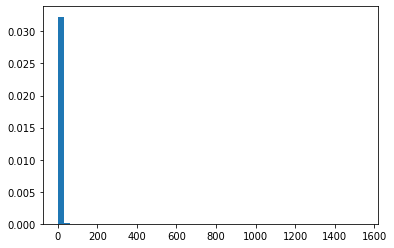

In [152]:
plt.hist(FB_degrees, density=True, bins=50)
plt.show()

In [153]:
betweenness_centrality = nx.betweenness_centrality(FBG)
print(max(betweenness_centrality, key=betweenness_centrality.get))

Kasia Macioszek


In [173]:
FB_degrees2 = [(node, val) for (node, val) in FBG.degree()]

In [174]:
FB_degrees2

[('Kasia Macioszek', 425),
 ('Karol Konieczko', 27),
 ('Mati ZajÄ…c', 387),
 ('Aleksandra Kutrzeba', 441),
 ('MichaĹ‚ Kita', 15),
 ('Magdalena Trepka', 3),
 ('Wiktoria Szymon', 391),
 ('MichaĹ‚ Jar', 11),
 ('Margarita Vikulova', 8),
 ('Miszelka Walusz', 49),
 ('Sabine Halt', 3),
 ('Bartek Tuzel', 17),
 ('Paulina Joniec', 6),
 ('Magdalena Marczak', 16),
 ('MichaĹ‚ Urbanek', 7),
 ('Maciej Antoni Ratajski', 22),
 ('Karolina Rzeszut', 7),
 ('Kamila Parzybut', 13),
 ('Kacper RĂłwnicki', 13),
 ('AndĹĽelika MrĂłz', 65),
 ('Julia Hergesell', 686),
 ('Aleksandra Anka Pawlak', 82),
 ('Sara Cebula', 55),
 ('Asia PudeĹ‚ko', 72),
 ('Marta Gurbierz', 679),
 ('Aleksandra Janecka', 918),
 ('RĂłĹĽa Jaros', 657),
 ('AnneLiese Hettinger', 403),
 ('Martyna Pindel', 7),
 ('Michaela MrĂłz', 318),
 ('Kuba MaĹ‚ota', 18),
 ('Dominika Kornek', 539),
 ('Anastazja Szynol', 129),
 ('Stefania Weronika Wilsz', 2),
 ('Nikola Ĺ»urek', 680),
 ('Bartek Kozak', 1),
 ('PaweĹ‚ Kossowski-Skop', 18),
 ('Waldemar Saft', 401),

In [175]:
betweenness_centrality

{'Kasia Macioszek': 0.352910986691605,
 'Karol Konieczko': 0.00027892476842147933,
 'Mati ZajÄ…c': 0.01527875409520353,
 'Aleksandra Kutrzeba': 0.0053780457879129065,
 'MichaĹ‚ Kita': 7.891965649915558e-05,
 'Magdalena Trepka': 6.43481825290291e-06,
 'Wiktoria Szymon': 0.010375525220349586,
 'MichaĹ‚ Jar': 3.8414851373738485e-05,
 'Margarita Vikulova': 2.8858579267974134e-05,
 'Miszelka Walusz': 0.00014584913268166384,
 'Sabine Halt': 0.0,
 'Bartek Tuzel': 0.00041097113761800265,
 'Paulina Joniec': 4.264404054473786e-05,
 'Magdalena Marczak': 0.0002065161406716675,
 'MichaĹ‚ Urbanek': 0.00013936937691338535,
 'Maciej Antoni Ratajski': 0.0010174915649360113,
 'Karolina Rzeszut': 2.3547189437222568e-05,
 'Kamila Parzybut': 6.075988799669696e-05,
 'Kacper RĂłwnicki': 0.0003609631686063957,
 'AndĹĽelika MrĂłz': 0.0013424069140983111,
 'Julia Hergesell': 0.01320933224192896,
 'Aleksandra Anka Pawlak': 0.0026012391035395124,
 'Sara Cebula': 0.0001790880377403095,
 'Asia PudeĹ‚ko': 0.00143585

In [176]:
degree_centrality

{'Kasia Macioszek': 0.009147260126555033,
 'Karol Konieczko': 0.0005811200550987904,
 'Mati ZajÄ…c': 0.008329387456415996,
 'Aleksandra Kutrzeba': 0.009491627566613576,
 'MichaĹ‚ Kita': 0.00032284447505488353,
 'Magdalena Trepka': 6.45688950109767e-05,
 'Wiktoria Szymon': 0.008415479316430632,
 'MichaĹ‚ Jar': 0.00023675261504024794,
 'Margarita Vikulova': 0.00017218372002927122,
 'Miszelka Walusz': 0.0010546252851792862,
 'Sabine Halt': 6.45688950109767e-05,
 'Bartek Tuzel': 0.00036589040506220135,
 'Paulina Joniec': 0.0001291377900219534,
 'Magdalena Marczak': 0.00034436744005854244,
 'MichaĹ‚ Urbanek': 0.00015066075502561231,
 'Maciej Antoni Ratajski': 0.0004735052300804959,
 'Karolina Rzeszut': 0.00015066075502561231,
 'Kamila Parzybut': 0.0002797985450475657,
 'Kacper RĂłwnicki': 0.0002797985450475657,
 'AndĹĽelika MrĂłz': 0.0013989927252378287,
 'Julia Hergesell': 0.014764753992510007,
 'Aleksandra Anka Pawlak': 0.00176488313030003,
 'Sara Cebula': 0.0011837630752012396,
 'Asia Pu